[![icons8-linkedin.gif](attachment:c9494563-7284-4c71-9fe4-40d31b4558ff.gif 'Author : Suryakant Kumar')](https://www.linkedin.com/in/suryakantkumar/)[![icons8-github.gif](attachment:ecd1af6f-8660-4379-b68f-bad3ed6d67c8.gif 'Author : Suryakant Kumar')](https://github.com/SuryakantKumar)
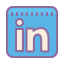
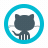

## Spark Context

Let's understand about SparkContext and how to start it using SparkSession.

* `SparkContext` maintains the context of all the jobs that are submitted until it is killed.

* `SparkSession` is a class that is part of `org.apache.spark.sql` package.

* `SparkSession` is nothing but wrapper on top of `SparkContext`. `SparkSession` creates `SparkContext` internally.

* When Spark application is submitted using `spark-submit` or `spark-shell` or `pyspark`, a web service called as `Spark Context` will get started.

* Here is the example about how `Spark Shell` can be launched locally.

```
spark-shell \
    --master "local[*]"
```

*  Even if we don't specify `master`, By default it will be using `local` mode only. However, we will not be able to say `--master yarn` on the `local` machine unless we have `Hadoop` also setup and integrated with `Spark`.

* `Spark Shell` can be launched on `multi-node` cluster But, first we need to understand that which custer mode we are using among `Yarn / Mesos / Standalone`.

```
spark2-shell \
    --master yarn \
    --conf spark.ui.port=0
```

* Whenever any SparkContext has been created, there will be web service that will be associated with the port number. By default, it is `4040`, but we can change it as per the availability of the port.

### Create SparkSession

* We can create `SparkSession` object with any name But typically we use `spark`. Once it is created, several APIs will be exposed including `read`.

* We need to atleast set `Application Name` and specify `execution mode` in which SparkContext should run while creating `SparkSession` object. 

* We can use `appName` to specify name for the application and `master` to specify the execution mode.

* `getOrCreate` will use any existing SparkSession if it is available else create it.

In [1]:
import org.apache.spark.sql.SparkSession

val spark = SparkSession.builder
                        .config("spark.ui.port", "0")
                        .appName("Spark Context")
                        .master("yarn")
                        .getOrCreate

Intitializing Scala interpreter ...

Spark Web UI available at http://172.20.10.2:4043
SparkContext available as 'sc' (version = 3.3.0, master = local[*], app id = local-1670418772804)
SparkSession available as 'spark'


22/12/07 18:42:57 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


import org.apache.spark.sql.SparkSession
spark: org.apache.spark.sql.SparkSession = org.apache.spark.sql.SparkSession@5f3d51f3


* There are two different modes of `yarn` as `yarn-client` or `yarn-cluster`.

In [2]:
spark

res0: org.apache.spark.sql.SparkSession = org.apache.spark.sql.SparkSession@5f3d51f3


* To get the details related to SparkContext

In [3]:
spark.sparkContext.getConf.getAll.foreach(println)

(spark.driver.extraJavaOptions,-XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED)
(spark.app.submitTime,1670418772058)
(spark.driver.port,50805)
(spark.app.startTime,1670418772161)
(spark.executor.id,driver)
(spark.app.name,spylon-kernel)
(spark.driver.host,172.20.10.2)
(spark.rdd.compress,True)
(spark.executor.extraJavaOp